## Analysis of Raw data
This notebook is for the analysis of Ising model with many interactions

In [1]:
# packages
import numpy as np
import pandas as pd
import sys
import os
import glob
import math

In [ ]:
# style.use("default")
# rcParams["text.usetex"] = False

In [11]:
# imports
path_import = "C:\\Users\\MHJGuillermo\\Documents\\Doctorado\\Ising\\Data\\VariosVecinos"
file_path = "RawData_Tpoints_100_Hpoints_100_nv_3_p_2_J1_1._J2_0.25_J3_0.111111_all.csv"
# file_path = "SpecificHeatMaxvsT_p_5.csv"

In [12]:
df = pd.read_csv(os.path.join(path_import,file_path))

In [13]:
def convert_to_real_number(string):
    list_eigen=[]
    eigen=string.replace("{","")
    eigen=eigen.replace("}","")
    eigen=eigen.split(',')
    for value in eigen:
        if " + " in value:
            number = value.split(" + ")[0]
        else:
            number = value.split(" - ")[0]
        number =number.replace("*^","E")
        list_eigen.append(float(number))
    return list_eigen

In [14]:
df['EigenVal'] = df['Eigenvalues'].map(convert_to_real_number)

In [15]:
df.head()

,Tem,h,wmax,λMax,Eigenvalues,FHelm,FHelmTL,EigenVal
0,0.03,0.000,5.059429e+19,1.0,"{1., 1., -1.8366674966636892*^-26, 1.836667496...",-1.363710,-1.361111,"[1.0, 1.0, -1.8366674966636892e-26, 1.83666749..."
1,0.03,0.003,5.591534e+19,1.0,"{0.9999999999999999, 0.8187307530779822, 1.006...",-1.364801,-1.364111,"[0.9999999999999999, 0.8187307530779822, 1.006..."
2,0.03,0.006,6.179600e+19,1.0,"{1., 0.6703200460356393, -8.237630105656797*^-...",-1.367261,-1.367111,"[1.0, 0.6703200460356393, -8.237630105656797e-..."
3,0.03,0.009,6.829515e+19,1.0,"{1., 0.5488116360940266, 6.744267614799188*^-2...",-1.370142,-1.370111,"[1.0, 0.5488116360940266, 6.744267614799188e-2..."
4,0.03,0.012,7.547781e+19,1.0,"{1., 0.4493289641172218, 5.52172291894926*^-22...",-1.373117,-1.373111,"[1.0, 0.4493289641172218, 5.52172291894926e-22..."


In [29]:
def calculous_free_energy(tem,wmax,eigenVal):
    free_energy = 0
    particle_number = 8
    partition_funct = 0
    for val in eigenVal:
        partition_funct += (val)**particle_number
    free_energy = -tem * (math.log(partition_funct) + math.log(wmax))
    
    return free_energy

In [26]:
df.iloc[0]['EigenVal']

[1.0,
 1.0,
 -1.8366674966636892e-26,
 1.8366674966557328e-26,
 -4.200112446566255e-28,
 -4.200112446566255e-28,
 0.0,
 0.0]

In [31]:
# df['FreeEnergyNum'] = 
df['FHelm8'] = df.apply(lambda row: calculous_free_energy(row['Tem'],row['wmax'],row['EigenVal']), axis = 1)

In [52]:
df.tail()

,Tem,h,wmax,λMax,Eigenvalues,FHelm,FHelmTL,EigenVal,FHelm8
9995,3.0,0.285,1.731008,1.257601,"{1.2576008536506351 + 0.*I, 0.7200578020833657...",-2.338035,-2.333729,"[1.2576008536506351, 0.7200578020833657, -0.14...",-7.181506
9996,3.0,0.288,1.732740,1.256683,"{1.2566827794240596 + 0.*I, 0.7191945853568011...",-2.338829,-2.334538,"[1.2566827794240596, 0.7191945853568011, -0.14...",-7.166850
9997,3.0,0.291,1.734473,1.255769,"{1.255768641591151 + 0.*I, 0.7183310672681585 ...",-2.339629,-2.335355,"[1.255768641591151, 0.7183310672681585, -0.146...",-7.152257
9998,3.0,0.294,1.736208,1.254858,"{1.2548584245178942 + 0.*I, 0.7174672561056432...",-2.340438,-2.336179,"[1.2548584245178942, 0.7174672561056432, -0.14...",-7.137725
9999,3.0,0.297,1.737946,1.253952,"{1.2539521125815059 + 0.*I, 0.7166031601608589...",-2.341254,-2.337012,"[1.2539521125815059, 0.7166031601608589, -0.14...",-7.123254


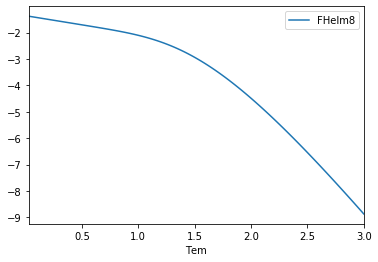

In [36]:
df.loc[df['h']==0].plot(x='Tem',y='FHelm8')

In [38]:
def calculous_free_energy_tl(tem,wmax,lambda_max):
    return -tem *(math.log(lambda_max) + math.log(wmax))

# Interpolation

In [40]:
    from scipy.interpolate import interp1d

In [43]:
df_free_energy = df.loc[df['h'] == 0][['Tem','FHelm']]

In [48]:
x = df_free_energy['Tem'].values
y = df_free_energy['FHelm'].values
free_energy_interpolate = interp1d(x,y)

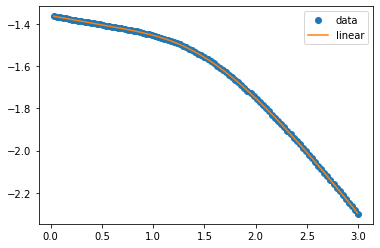

In [59]:
xnew = np.linspace(0.03, 3, num=500, endpoint=False)
import matplotlib.pyplot as plt
plt.plot(x,y,'o',xnew,free_energy_interpolate(xnew), '-' )
plt.legend(['data','linear'], loc='best')
plt.show()

In [62]:
from scipy.misc import derivative
def specific_heat(tem):
    return -tem*derivative(free_energy_interpolate,tem,n=2,dx=1e-3)

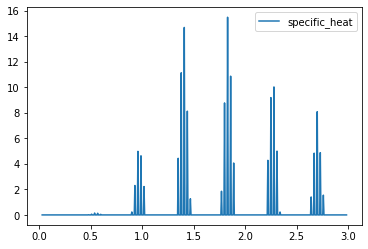

In [65]:
xnew = np.linspace(0.031, 2.99, num=500, endpoint=False)
import matplotlib.pyplot as plt
plt.plot(xnew,specific_heat(xnew), '-' )
plt.legend(['specific_heat'], loc='best')
plt.show()

In [2]:
1/np.arange(1,11,1)**2

array([1.        , 0.25      , 0.11111111, 0.0625    , 0.04      ,
       0.02777778, 0.02040816, 0.015625  , 0.01234568, 0.01      ])

In [4]:
2**9

512